# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
locations = []
max_temp = []

#Print log should look like:
print("Beginning Data Retrieval")
print("-------------------------")

# Loop through the list of cities and perform a request for data on each. Add to log

for city in cities:
    target_url = query_url + city
    response = requests.get(target_url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        locations.append(city)
        print(f"Processing Record | {city} found")
    except KeyError:
        print(f"Processing Record | {city} not found")
        pass
    

Beginning Data Retrieval
-------------------------
Processing Record | male found
Processing Record | la mira found
Processing Record | henties bay found
Processing Record | rikitea found
Processing Record | cape town found
Processing Record | terralba found
Processing Record | katsuura found
Processing Record | ruatoria not found
Processing Record | busselton found
Processing Record | ribeira grande found
Processing Record | bolshoye sorokino not found
Processing Record | praia da vitoria found
Processing Record | laguna found
Processing Record | vaitupu not found
Processing Record | namibe found
Processing Record | bluff found
Processing Record | chuy found
Processing Record | broome found
Processing Record | hirara found
Processing Record | hobart found
Processing Record | karauzyak not found
Processing Record | avarua found
Processing Record | kloulklubed found
Processing Record | punta arenas found
Processing Record | port hardy found
Processing Record | nikolskoye found
Processin

Processing Record | paradwip not found
Processing Record | hamilton found
Processing Record | sulangan found
Processing Record | saint george found
Processing Record | miri found
Processing Record | chagda not found
Processing Record | torbay found
Processing Record | bend found
Processing Record | alice springs found
Processing Record | ust-nera found
Processing Record | borger found
Processing Record | mirabad found
Processing Record | watsa found
Processing Record | qaanaaq found
Processing Record | gejiu found
Processing Record | ambunti found
Processing Record | isabela found
Processing Record | pevek found
Processing Record | lavrentiya found
Processing Record | lazaro cardenas found
Processing Record | geraldton found
Processing Record | amderma not found
Processing Record | barentsburg not found
Processing Record | anadyr found
Processing Record | bowen found
Processing Record | puerto ayacucho found
Processing Record | walvis bay found
Processing Record | morondava found
Proce

Processing Record | stepnyak found
Processing Record | zambezi found
Processing Record | meulaboh found
Processing Record | coachella found
Processing Record | sydney found
Processing Record | chernyshevskiy found
Processing Record | acapulco found
Processing Record | zhanaozen found
Processing Record | juneau found
Processing Record | batsfjord found
Processing Record | moerbeke found
Processing Record | bintulu found
Processing Record | lata found
Processing Record | tandil found
Processing Record | pisco found
Processing Record | gondanglegi found
Processing Record | stornoway found
Processing Record | balkhash found
Processing Record | sioux lookout found
Processing Record | harrisonburg found
Processing Record | tokur found
Processing Record | businga found
Processing Record | kalemie found
Processing Record | grants pass found
Processing Record | cabra found
Processing Record | bakel found
Processing Record | narasapur found
Processing Record | camacha found
Processing Record | p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from lists generated
weather_dict = {
    "City": locations,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud, 
    "Wind Speed": wind,
    "Max Temp": max_temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,male,4.17,73.51,82.40,69,5,12.75,82.40
1,la mira,18.04,-102.33,73.98,83,90,8.03,73.98
2,henties bay,-22.12,14.28,63.00,92,73,1.99,63.00
3,rikitea,-23.12,-134.97,79.14,79,100,13.82,79.14
4,cape town,-33.93,18.42,64.69,72,58,20.80,68.00


In [5]:
#export the city data into a csv
weather_data.to_csv('weather_data',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

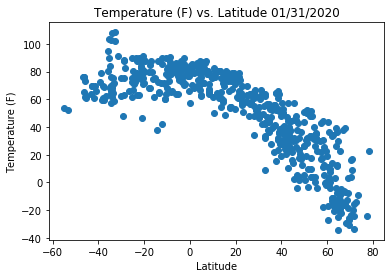

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a Scatter Plot for latitude vs temperature
x_values = weather_data['Latitude']
y_values = weather_data['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(('Temperature (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('temperature_latitude')

Observation: It appears that latitudes that are located in the southern hemisphere are currently experiencing warmer weather than those in the northern hemisphere, which ultimately makes sense since those of us in the northern hemisphere are experiencing winter currently, while those in the southern hemisphere are experiencing summer.


#### Latitude vs. Humidity Plot

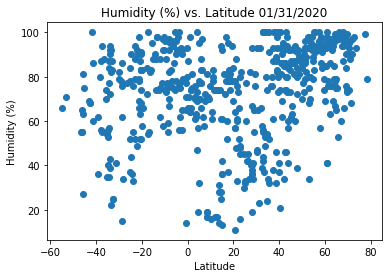

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Latitude']
y_values1 = weather_data['Humidity']
plt.scatter(x_values,y_values1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('humidity_latitude')

Observation:  It appears that there is no real relationship between latitude and humidity.  This makes sense as the Earth has various environments with an array of humidities (desert, wetland, rainforest, etc.) that aren't necessarily dictated by the latitude of the location. 

#### Latitude vs. Cloudiness Plot

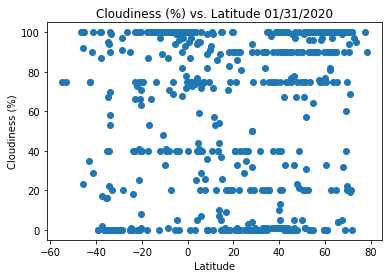

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Latitude']
y_values2 = weather_data['Cloudiness']
plt.scatter(x_values,y_values2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('cloudiness_latitude')

Observation: This graph has really distinct lines running through it at distinct cloudiness percentages.  My hypothesis is that cloudiness is reported at those intervals a majority of the time.

#### Latitude vs. Wind Speed Plot

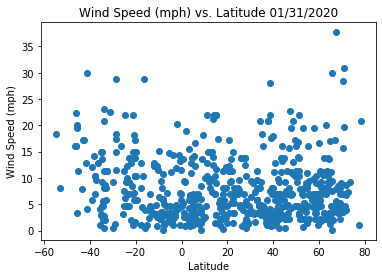

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_data['Latitude']
y_values3 = weather_data['Wind Speed']
plt.scatter(x_values,y_values3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('wind speed_latitude')

Observation: Once again, it does not look like there is an obvious relationship between wind speed and latitude.  Most locations have a wind speed of 25 mph or less.  

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern Hemisphere DataFrame
northern_df = weather_data.loc[weather_data['Latitude'] > 0 ]
northern_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,male,4.17,73.51,82.40,69,5,12.75,82.40
1,la mira,18.04,-102.33,73.98,83,90,8.03,73.98
5,terralba,39.72,8.64,48.20,100,10,6.93,48.20
6,katsuura,35.13,140.30,53.24,34,20,18.34,53.60
8,ribeira grande,38.52,-28.70,61.27,89,100,21.99,61.27


In [12]:
# Create Southern Hemisphere DataFrame
southern_df = weather_data.loc[weather_data['Latitude'] < 0 ]
southern_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
2,henties bay,-22.12,14.28,63.00,92,73,1.99,63.00
3,rikitea,-23.12,-134.97,79.14,79,100,13.82,79.14
4,cape town,-33.93,18.42,64.69,72,58,20.80,68.00
7,busselton,-33.65,115.33,75.24,22,0,8.59,78.01
11,namibe,-15.20,12.15,75.43,88,100,1.12,75.43


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.762


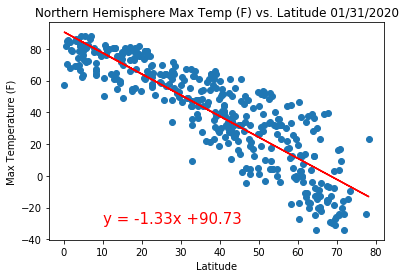

<Figure size 432x288 with 0 Axes>

In [13]:
#x & y
north_lat = northern_df['Latitude']
north_max_temp = northern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(('Northern Hemisphere Max Temp (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_maxtemp_latitude')

Observation: There is a fairly strong negative linear relationship between northern hemisphere latitude and max temperature.  That being said, I believe that when the season changes and it is summer again, the linear relationship will likely go away because there won't be as extreme of temperature difference between the latitudes.  This relationship is dynamic.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.028


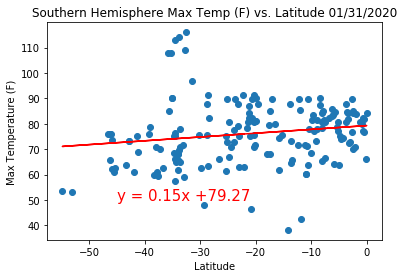

<Figure size 432x288 with 0 Axes>

In [15]:
#x & y
south_lat = southern_df['Latitude']
south_max_temp = southern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(('Southern Hemisphere Max Temp (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_maxtemp_latitude')

Observation: It appears there is no relationship between max temp and latitude in the southern hemisphere.  This is likely because it is summer there now and there is less of a difference in temperature across latitude in the summer than in the winter time.  Once again, I predict this changes into a positive linear relationship in the winter time.  This relationship is dynamic.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.185


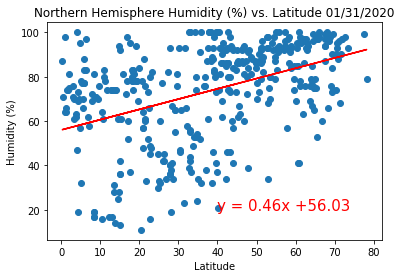

<Figure size 432x288 with 0 Axes>

In [16]:
#x & y
north_humid = northern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_humid)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Northern Hemisphere Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_humidity_latitude')

Observation: There is not a significant relationship between humidity and latitude in either the northern or southern hemispheres.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.106


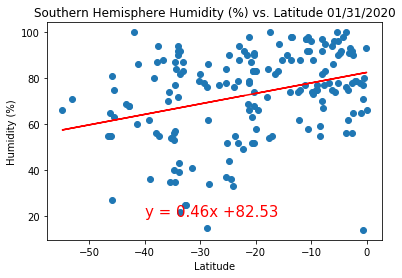

<Figure size 432x288 with 0 Axes>

In [17]:
#x & y
south_humid = southern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_humid)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Southern Hemisphere Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_humidity_latitude')

Observation: There is not a significant relationship between humidity and latitude in either the northern or southern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.065


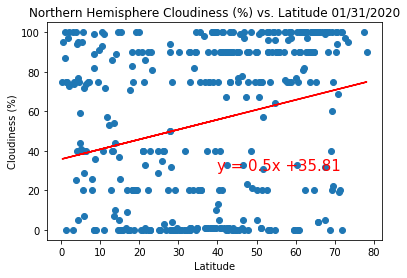

<Figure size 432x288 with 0 Axes>

In [18]:
#x & y
north_cloud = northern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_cloud)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Northern Hemisphere Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_cloud_latitude')

Observation:  There really is no significant relationship between cloudiness and latitude for either the northern or southern hemispheres.  Once again there appears to be lines across the graph which may be due to how cloudiness is reported.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.086


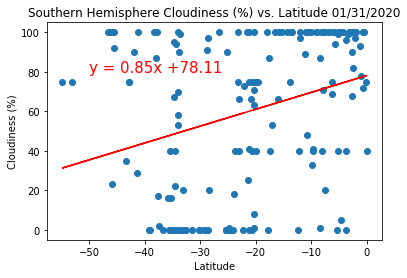

<Figure size 432x288 with 0 Axes>

In [19]:
#x & y
south_cloud = southern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_cloud)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Southern Hemisphere Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_cloud_latitude')

Observation:  There really is no significant relationship between cloudiness and latitude for either the northern or southern hemispheres.  Once again there appears to be lines across the graph which may be due to how cloudiness is reported.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005


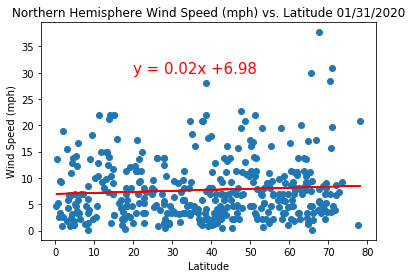

<Figure size 432x288 with 0 Axes>

In [21]:
#x & y
north_wind = northern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_wind)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Northern Hemisphere Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_wind_latitude')

Observation:  There really is no significant relationship between wind speed and latitude for either the northern or southern hemispheres.  Once again, most speeds fall under 25 miles per hour, but there is no obvious pattern otherwise.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.137


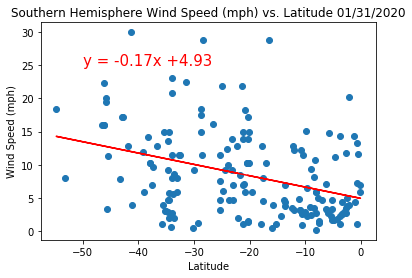

<Figure size 432x288 with 0 Axes>

In [24]:
#x & y
south_wind = southern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_wind)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Southern Hemisphere Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_wind_latitude')

Observation:  There really is no significant relationship between wind speed and latitude for either the northern or southern hemispheres.  Once again, most speeds fall under 25 miles per hour, but there is no obvious pattern otherwise.

Overall Observations:
1. It seems that there is a high correlation between latitude and temperature in hemispheres that are currently experiencing winter.
2. Hemipheres that are experiencing summer have very little correlation between temperature and latitude, however this is a dynamic relationship.  As the seasons change, the correlation will likely get stronger.
3. Besides temperature there really is no other relationship between latitude and cloudiness, humidity, or wind speed.  My guess is that the characteristics of the location define those metrics rather than latitude.